In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [47]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak")

In [48]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [49]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [50]:
# Drop CustomerID (not useful for clustering)
df = df.drop("CustomerID", axis=1)

In [51]:
# Convert Gender to numeric
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0

# Select features (Annual Income & Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

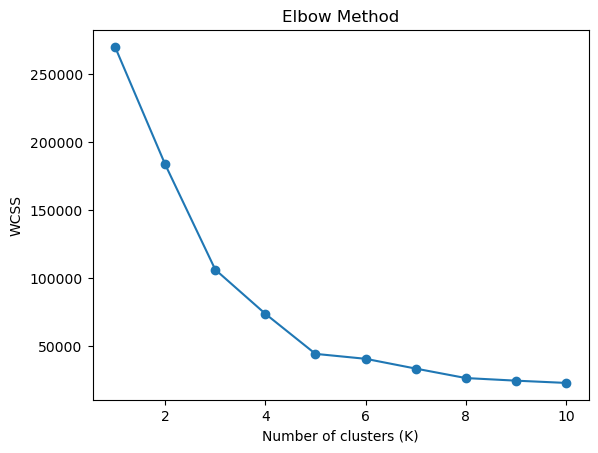

In [52]:
# Elbow Method to find optimal K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [53]:
# Apply K-Means with chosen K (example: K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Add cluster labels to dataset
df['Cluster'] = y_kmeans

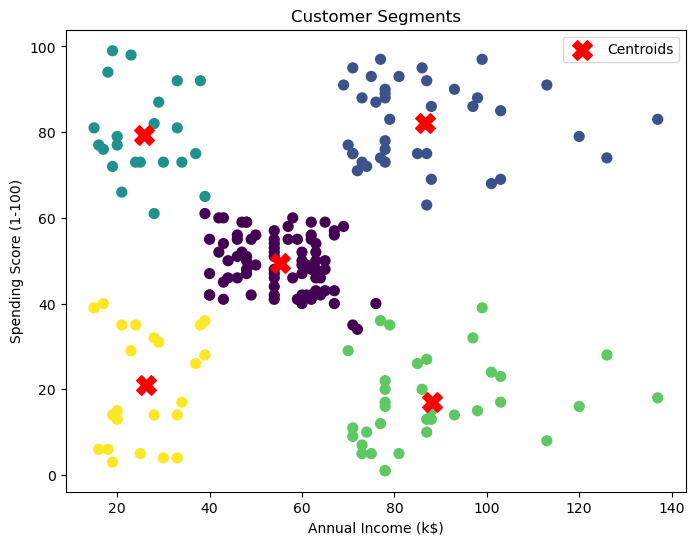

In [54]:
# Visualize Clusters
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [55]:
# Evaluate with Silhouette Score
score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {score:.2f}")

# Save clustered data
df.to_csv("Mall_Customers_Clustered.csv", index=False)
print("Clustered data saved to Mall_Customers_Clustered.csv")

Silhouette Score: 0.55
Clustered data saved to Mall_Customers_Clustered.csv
